# CyberBullying Detection using NLP & Machine Learning (Dataset creation)

### 1. Libraries

In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### 2. Import Datasets

In [2]:
df_cyberbullying_tweets = pd.read_csv("Datasets/cyberbullying_tweets.csv")
df_cyberBullyingIEEE = pd.read_csv("Datasets/CyberBullyingTypesDataset.csv")
df_cybertroll = pd.read_csv("Datasets/cybertroll_dataset.csv")
df_cyberbullying_classified = pd.read_csv("Datasets/classified_tweets.csv")

### 3.  Check first 10 lines of any dataset

#### 3.1  cyberbullying_tweets.csv

In [3]:
df_cyberbullying_tweets.head(10)

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
5  @Raja5aab @Quickieleaks Yes, the test of god i...  not_cyberbullying
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying
7  Karma. I hope it bites Kat on the butt. She is...  not_cyberbullying
8       @stockputout everything but mostly my priest  not_cyberbullying
9  Rebecca Black Drops Out of School Due to Bully...  not_cyberbullying

#### 3.2  CyberBullyingTypesDataset.csv

In [4]:
df_cyberBullyingIEEE.head(10)

Tweet              Class
0  Post-Cuomo push to toughen NY sexual harassmen...  Sexual Harassment
1  Push to toughen NY sexual harassment laws that...  Sexual Harassment
2  @GabbieHanna As if Trisha didn’t accuse him of...  Sexual Harassment
3  @fentsemadii True is that 🔥 thou I know nothin...  Sexual Harassment
4  Watch the recap video of the two-day hands-on ...  Sexual Harassment
5  I think this is sexual harassment.  The duck i...  Sexual Harassment
6  cases of sexual harassment and abuse can never...  Sexual Harassment
7  Sexual harassment policies don’t exist in most...  Sexual Harassment
8  @TheLeadCNN Biden's Afghanistan speech yesterd...  Sexual Harassment
9  Chris Cuomo Breaks Silence About Andrew Cuomo’...  Sexual Harassment

#### 3.3

In [5]:
df_cybertroll.head(10)

content  annotation
0                             Get fucking real dude.           1
1   She is as dirty as they come  and that crook ...           1
2   why did you fuck it up. I could do it all day...           1
3   Dude they dont finish enclosing the fucking s...           1
4   WTF are you talking about Men? No men thats n...           1
5   Ill save you the trouble sister. Here comes a...           1
6   Im dead serious.Real athletes never cheat don...           1
7   ...go absolutely insane.hate to be the bearer...           1
8   Lmao  im watching the same thing ahaha. The g...           1
9   LOL  no he said  What do you call a jail cell...           1

#### 3.4 classified_tweets.csv

In [6]:
df_cyberbullying_classified.head(10)

text  suspicious  \
0    Uhmm like 6th grade on a corner of a street....           0   
1        a) JTP is a douchebag b) Stewart kicks ass!           1   
2                                       ditto bitch!           1   
3  damn I have to drive my dad to the airport tha...           0   
4                                                 :]           0   
5  Hahaa.. Very true.. It might just be some cond...           0   
6                        damn your Jedi mind tricks!           1   
7                                 OMG that sucks! D:           1   
8   If you could have anyone locked in a room so ...           0   
9           umm a homeless guys with blackberry haha           0   

   cyberbullying  hate  suicidal  
0              0     0         0  
1              0     0         0  
2              0     0         0  
3              0     0         0  
4              0     0         0  
5              0     0         0  
6              0     0         0  
7              0     0         0  
8              0     0         0  
9              0     0         0

### 4. Check Datasets type values and sum

#### 4.1  cyberbullying_tweets.csv

In [7]:
df_cyberbullying_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [8]:
df_cyberbullying_tweets['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

#### 4.2  CyberBullyingTypesDataset.csv

In [9]:
df_cyberBullyingIEEE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2140 non-null   object
 1   Class   2140 non-null   object
dtypes: object(2)
memory usage: 33.6+ KB


In [10]:
df_cyberBullyingIEEE['Class'].value_counts()

Sexual Harassment    500
Slut Shaming         500
Doxing               441
Revenge Porn         396
Cyberstalking        303
Name: Class, dtype: int64

#### 4.3  cybertroll_dataset.csv

In [11]:
df_cybertroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     20001 non-null  object
 1   annotation  20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [12]:
df_cybertroll['annotation'].value_counts()

0    12179
1     7822
Name: annotation, dtype: int64

#### 4.4  classified_tweets.csv


In [13]:
df_cyberbullying_classified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19934 entries, 0 to 19933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           19934 non-null  object
 1   suspicious     19934 non-null  int64 
 2   cyberbullying  19934 non-null  int64 
 3   hate           19934 non-null  int64 
 4   suicidal       19934 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 778.8+ KB


In [14]:
df_cyberbullying_classified['suspicious'].value_counts()

0    12719
1     7215
Name: suspicious, dtype: int64

In [15]:
df_cyberbullying_classified['cyberbullying'].value_counts()

0    17256
2     1733
1      945
Name: cyberbullying, dtype: int64

In [16]:
df_cyberbullying_classified['hate'].value_counts()

0    17256
2     1733
1      945
Name: hate, dtype: int64

In [17]:
df_cyberbullying_classified['suicidal'].value_counts()

0    18886
1     1048
Name: suicidal, dtype: int64

### 5. Graph of any Dataset

#### 5.1 cyberbullying_tweets.csv

[Text(0.5, 1.0, 'Graph of cyberbullying_tweets.csv')]

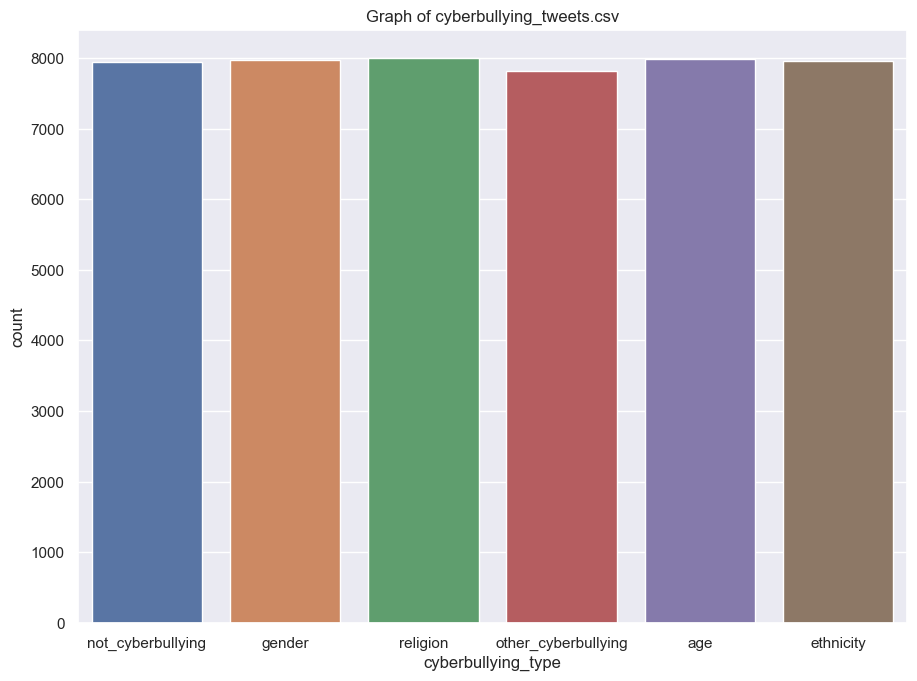

In [18]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type', data=df_cyberbullying_tweets).set(title="Graph of cyberbullying_tweets.csv")

#### 5.2 CyberBullyingTypesDataset.csv

[Text(0.5, 1.0, 'Graph of CyberBullyingTypesDataset.csv')]

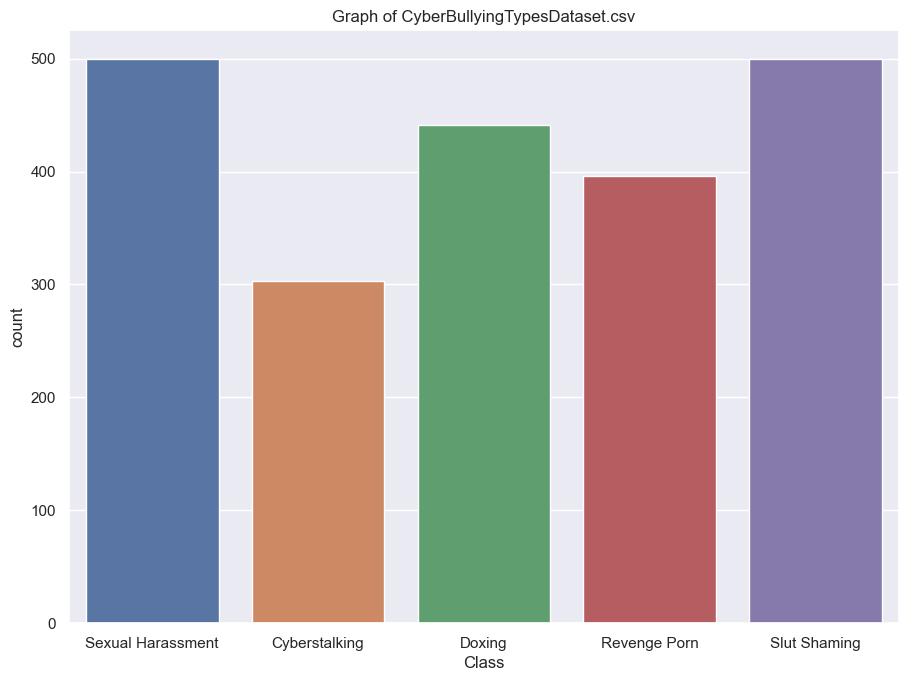

In [19]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='Class', data=df_cyberBullyingIEEE).set(title="Graph of CyberBullyingTypesDataset.csv")

#### 5.3 cybertroll_dataset.csv

[Text(0.5, 1.0, 'Graph of cybertroll_dataset.csv')]

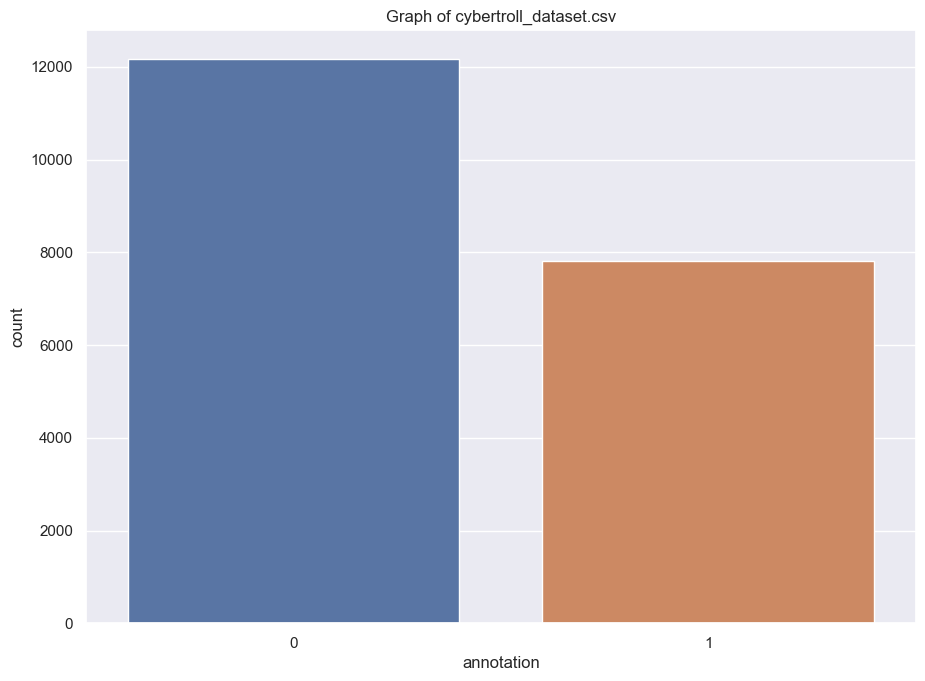

In [20]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='annotation', data=df_cybertroll).set(title="Graph of cybertroll_dataset.csv")

#### 5.4 classified_tweets.csv

[Text(0.5, 1.0, 'Graph of classified_tweets.csv')]

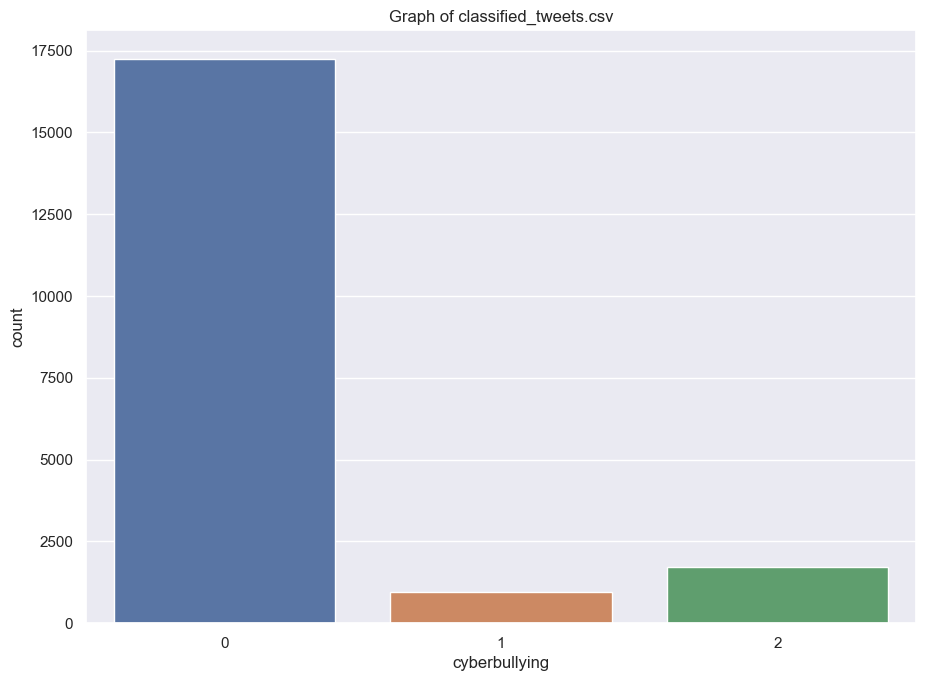

In [21]:
sns.set(rc={'figure.figsize': (10.7, 7.7)})
sns.countplot(x='cyberbullying', data=df_cyberbullying_classified).set(title="Graph of classified_tweets.csv")

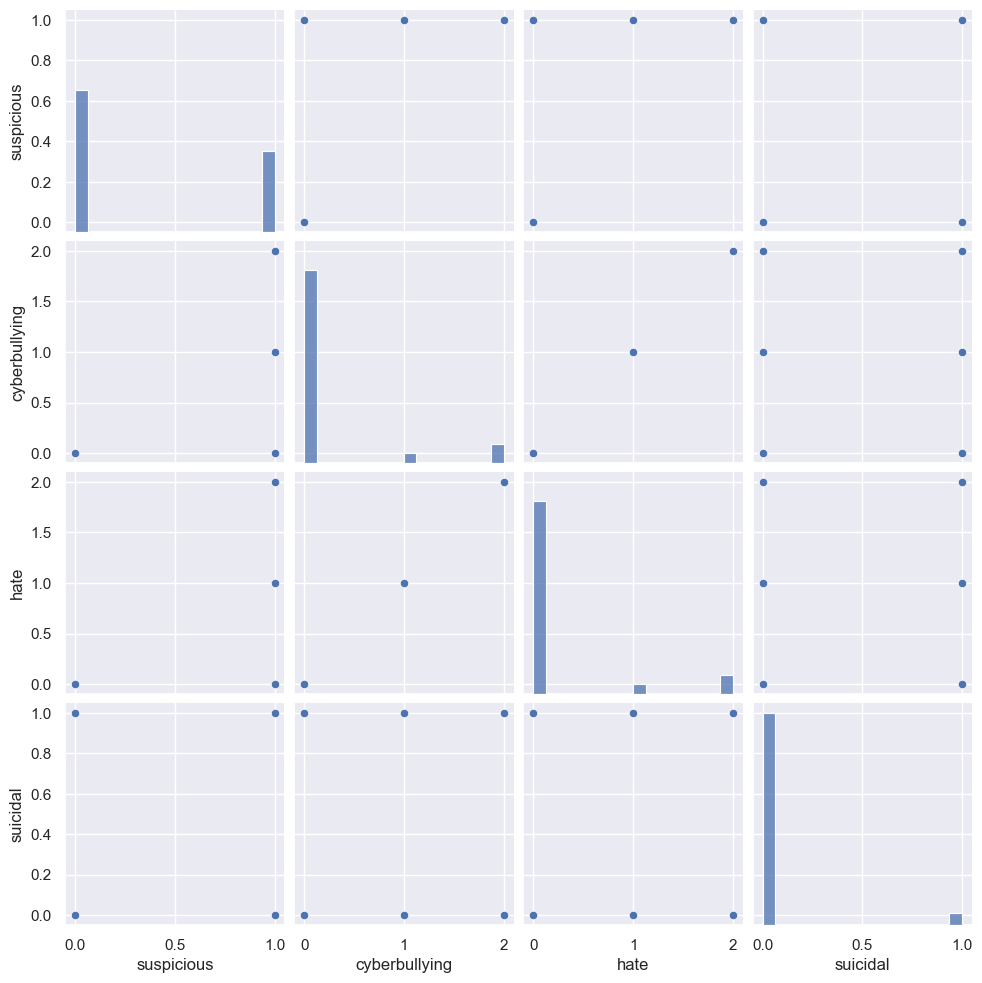

In [22]:
columns = ['suspicious', 'cyberbullying', 'hate', 'suicidal']
sns.pairplot(df_cyberbullying_classified[columns])
plt.show()

### 6. Find & Drop non-English text


In [23]:
from langdetect import detect

def detect_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

#### 6.1 cyberbullying_tweets.csv


In [24]:
df_cyberbullying_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [25]:
df_cyberbullying_tweets = df_cyberbullying_tweets[df_cyberbullying_tweets['tweet_text'].apply(detect_english)]

In [26]:
df_cyberbullying_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          44656 non-null  object
 1   cyberbullying_type  44656 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


#### 6.2 CyberBullyingTypesDataset.csv

In [27]:
df_cyberBullyingIEEE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2140 non-null   object
 1   Class   2140 non-null   object
dtypes: object(2)
memory usage: 33.6+ KB


In [28]:
df_cyberBullyingIEEE = df_cyberBullyingIEEE[df_cyberBullyingIEEE['Tweet'].apply(detect_english)]

In [29]:
df_cyberBullyingIEEE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2056 non-null   object
 1   Class   2056 non-null   object
dtypes: object(2)
memory usage: 48.2+ KB


#### 6.3 cybertroll_dataset.csv

In [30]:
df_cybertroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     20001 non-null  object
 1   annotation  20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [31]:
df_cybertroll = df_cybertroll[df_cybertroll['content'].apply(detect_english)]

In [32]:
df_cybertroll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16966 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     16966 non-null  object
 1   annotation  16966 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 397.6+ KB


#### 6.4 classified_tweets.csv

In [33]:
df_cyberbullying_classified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19934 entries, 0 to 19933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           19934 non-null  object
 1   suspicious     19934 non-null  int64 
 2   cyberbullying  19934 non-null  int64 
 3   hate           19934 non-null  int64 
 4   suicidal       19934 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 778.8+ KB


In [34]:
df_cyberbullying_classified = df_cyberbullying_classified[df_cyberbullying_classified['text'].apply(detect_english)]

In [35]:
df_cyberbullying_classified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17733 entries, 0 to 19933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           17733 non-null  object
 1   suspicious     17733 non-null  int64 
 2   cyberbullying  17733 non-null  int64 
 3   hate           17733 non-null  int64 
 4   suicidal       17733 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 831.2+ KB


In [36]:
# Sum = 81420

### 7. Classification for cyberbullying/not cyberbullying & rename columns

#### 7.1 cyberbullying_tweets.csv

In [37]:
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"not_cyberbullying": 0})
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"ethnicity": 1})
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"age": 1})
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"gender": 1})
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"religion": 1})
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"other_cyberbullying": 1})
df_cyberbullying_tweets.to_csv('ExportedDatasetsNew/cyberbullying_tweets_class.csv', index=False)

In [38]:
df_cyberbullying_tweets.head()

tweet_text  cyberbullying_type
0  In other words #katandandre, your food was cra...                   0
1  Why is #aussietv so white? #MKR #theblock #ImA...                   0
2  @XochitlSuckkks a classy whore? Or more red ve...                   0
3  @Jason_Gio meh. :P  thanks for the heads up, b...                   0
4  @RudhoeEnglish This is an ISIS account pretend...                   0

In [39]:
df_cyberbullying_tweets.tail()

tweet_text  cyberbullying_type
47687  Black ppl aren't expected to do anything, depe...                   1
47688  Turner did not withhold his disappointment. Tu...                   1
47689  I swear to God. This dumb nigger bitch. I have...                   1
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...                   1
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...                   1

In [40]:
df_cyberbullying_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          44656 non-null  object
 1   cyberbullying_type  44656 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


#### 7.2 CyberBullyingTypesDataset.csv


In [41]:
df_cyberBullyingIEEE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2056 non-null   object
 1   Class   2056 non-null   object
dtypes: object(2)
memory usage: 48.2+ KB


In [42]:
df_cyberBullyingIEEE = df_cyberBullyingIEEE.rename(columns=({'Tweet':'tweet_text'}))
df_cyberBullyingIEEE = df_cyberBullyingIEEE.rename(columns=({'Class':'cyberbullying_type'}))
df_cyberBullyingIEEE["cyberbullying_type"] = df_cyberBullyingIEEE["cyberbullying_type"].replace({"Sexual Harassment": 0})
df_cyberBullyingIEEE["cyberbullying_type"] = df_cyberBullyingIEEE["cyberbullying_type"].replace({"Cyberstalking": 1})
df_cyberBullyingIEEE["cyberbullying_type"] = df_cyberBullyingIEEE["cyberbullying_type"].replace({"Doxing": 0})
df_cyberBullyingIEEE["cyberbullying_type"] = df_cyberBullyingIEEE["cyberbullying_type"].replace({"Revenge Porn": 1})
df_cyberBullyingIEEE["cyberbullying_type"] = df_cyberBullyingIEEE["cyberbullying_type"].replace({"Slut Shaming": 1})
df_cyberBullyingIEEE['cyberbullying_type'] = df_cyberBullyingIEEE['cyberbullying_type'].astype('int64')

In [43]:
df_cyberBullyingIEEE.to_csv('ExportedDatasetsNew/CyberBullyingTypesDataset2_class.csv', index=False)

In [44]:
df_cyberBullyingIEEE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2138
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          2056 non-null   object
 1   cyberbullying_type  2056 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.2+ KB


#### 7.3 cybertroll_dataset.csv

In [45]:
df_cybertroll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16966 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     16966 non-null  object
 1   annotation  16966 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 397.6+ KB


In [46]:
df_cybertroll = df_cybertroll.rename(columns=({'content':'tweet_text'}))
df_cybertroll = df_cybertroll.rename(columns=({'annotation':'cyberbullying_type'}))
df_cybertroll.to_csv('ExportedDatasetsNew/cybertroll_dataset_class.csv', index=False)

In [47]:
df_cybertroll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16966 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          16966 non-null  object
 1   cyberbullying_type  16966 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 397.6+ KB


#### 7.4 classified_tweets.csv

In [48]:
df_cyberbullying_classified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17733 entries, 0 to 19933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           17733 non-null  object
 1   suspicious     17733 non-null  int64 
 2   cyberbullying  17733 non-null  int64 
 3   hate           17733 non-null  int64 
 4   suicidal       17733 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 831.2+ KB


In [49]:
df_cyberbullying_classified = df_cyberbullying_classified.drop(columns=['suspicious','hate','suicidal'])
df_cyberbullying_classified = df_cyberbullying_classified.rename(columns=({'text':'tweet_text'}))
df_cyberbullying_classified = df_cyberbullying_classified.rename(columns=({'cyberbullying':'cyberbullying_type'}))
df_cyberbullying_classified["cyberbullying_type"] = df_cyberbullying_classified["cyberbullying_type"].replace({2: 1})
df_cyberbullying_classified.to_csv('ExportedDatasetsNew/classified_tweets_class.csv', index=False)

In [50]:
df_cyberbullying_classified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17733 entries, 0 to 19933
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          17733 non-null  object
 1   cyberbullying_type  17733 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 415.6+ KB


### 8. Addition of Datasets (Final Dataset)

In [51]:
df_cyber = pd.concat([df_cyberbullying_tweets,df_cyberBullyingIEEE,df_cybertroll,df_cyberbullying_classified])

In [52]:
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying2.csv', index=False)

In [53]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81411 entries, 0 to 19933
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          81411 non-null  object
 1   cyberbullying_type  81411 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [54]:
df_cyber.head(10)

tweet_text  cyberbullying_type
0   In other words #katandandre, your food was cra...                   0
1   Why is #aussietv so white? #MKR #theblock #ImA...                   0
2   @XochitlSuckkks a classy whore? Or more red ve...                   0
3   @Jason_Gio meh. :P  thanks for the heads up, b...                   0
4   @RudhoeEnglish This is an ISIS account pretend...                   0
5   @Raja5aab @Quickieleaks Yes, the test of god i...                   0
7   Karma. I hope it bites Kat on the butt. She is...                   0
8        @stockputout everything but mostly my priest                   0
9   Rebecca Black Drops Out of School Due to Bully...                   0
10               @Jord_Is_Dead http://t.co/UsQInYW5Gn                   0

### 8.1 Identify & Drop Missing Data

In [55]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81411 entries, 0 to 19933
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          81411 non-null  object
 1   cyberbullying_type  81411 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [56]:
print(df_cyber.isnull().sum())

tweet_text            0
cyberbullying_type    0
dtype: int64


In [57]:
df_cyber = df_cyber.dropna()

In [58]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81411 entries, 0 to 19933
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          81411 non-null  object
 1   cyberbullying_type  81411 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


### 8.2 Identify & Drop Duplicates

In [59]:
print(df_cyber.duplicated().sum())

11288


In [60]:
df_cyber.drop_duplicates(keep=False, inplace=True)

In [61]:
print(df_cyber.duplicated().sum())

0


In [62]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61514 entries, 2 to 19933
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          61514 non-null  object
 1   cyberbullying_type  61514 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


### 8.3 Clean Dataset

In [63]:
def clean_tweets(tweet):
    # remove URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove usernames
    tweet = re.sub(r'@[^\s]+[\s]?','',tweet)
    # Remove hashtags
    tweet = re.sub(r'#[^\s]+[\s]?','',tweet)
    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    # remove RT
    tweet = re.sub('RT' , '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [64]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(clean_tweets)
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying_clean.csv', index=False)
df_cyber.head(30)

tweet_text  cyberbullying_type
2          a classy whore Or more red velvet cupcakes                   0
3   meh P  thanks for the heads up but not too con...                   0
5   Yes the test of god is that good or bad or ind...                   0
7   Karma I hope it bites Kat on the butt She is j...                   0
9   Rebecca Black Drops Out of School Due to Bullying                   0
11                           The Bully flushes on KD                    0
13   Turkish state has killed  children in last  y...                   0
14  Love that the best response to the hotcakes th...                   0
17  twitter is basically the angry letters of our ...                   0
18  Best pick up line Hi youre cute  I love how pe...                   0
19  Now I gotta walk to classss I officially hate ...                   0
20  I know Saudis chased girls into a burning buil...                   0
22  I still have Jack Amsterdam Ciroc Crown Bud Li...                   0
25               Education Nation Bullying  Turn to                     0
26                                    Isso  bullying                    0
29  You know there are people out there who like b...                   0
30  not the first time its happened That was proba...                   0
33  The thing about Uber is even if it wasnt a hor...                   0
34  I think third period teacher doesnt like me he...                   0
36  I hope this round humbled the girls they cant ...                   0
37  Look at what DC Public Schools are doing for b...                   0
38  Really miss my classmates n schoolmates See yo...                   0
41                         Hey Ma in the orange skirt                   0
42                           Fuck this paper bullshit                   0
43                          Elephants Direct them to                    0
45                      a Charlie Brown Thanksgiving                    0
46      Lets talk about what it means to be a victim                    0
47                         no you are ahhhhhmazing lt                   0
49              no one ever helpme like my bully did                    0
51  E will lead to shutting down of Badal schools ...                   0

In [65]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61514 entries, 2 to 19933
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          61514 non-null  object
 1   cyberbullying_type  61514 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [66]:
# Identify rows with empty text
empty_rows = df_cyber[df_cyber.applymap(lambda x: x == '').any(axis=1)]

# Remove these rows from the dataset
df_cyber = df_cyber.drop(empty_rows.index)

In [67]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61323 entries, 2 to 19933
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          61323 non-null  object
 1   cyberbullying_type  61323 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [68]:
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying_clean_empty.csv', index=False)
df_cyber.head(30)

tweet_text  cyberbullying_type
2          a classy whore Or more red velvet cupcakes                   0
3   meh P  thanks for the heads up but not too con...                   0
5   Yes the test of god is that good or bad or ind...                   0
7   Karma I hope it bites Kat on the butt She is j...                   0
9   Rebecca Black Drops Out of School Due to Bullying                   0
11                           The Bully flushes on KD                    0
13   Turkish state has killed  children in last  y...                   0
14  Love that the best response to the hotcakes th...                   0
17  twitter is basically the angry letters of our ...                   0
18  Best pick up line Hi youre cute  I love how pe...                   0
19  Now I gotta walk to classss I officially hate ...                   0
20  I know Saudis chased girls into a burning buil...                   0
22  I still have Jack Amsterdam Ciroc Crown Bud Li...                   0
25               Education Nation Bullying  Turn to                     0
26                                    Isso  bullying                    0
29  You know there are people out there who like b...                   0
30  not the first time its happened That was proba...                   0
33  The thing about Uber is even if it wasnt a hor...                   0
34  I think third period teacher doesnt like me he...                   0
36  I hope this round humbled the girls they cant ...                   0
37  Look at what DC Public Schools are doing for b...                   0
38  Really miss my classmates n schoolmates See yo...                   0
41                         Hey Ma in the orange skirt                   0
42                           Fuck this paper bullshit                   0
43                          Elephants Direct them to                    0
45                      a Charlie Brown Thanksgiving                    0
46      Lets talk about what it means to be a victim                    0
47                         no you are ahhhhhmazing lt                   0
49              no one ever helpme like my bully did                    0
51  E will lead to shutting down of Badal schools ...                   0

### 8.5 Remove stopwords

In [69]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = text.lower() # Convert to lowercase
    text = [word for word in text.split() if word not in stopwords.words('english')] # Remove stopwords
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(preprocess_text)

In [71]:
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying_final.csv', index=False)

In [72]:
df_cyber.head(10)

tweet_text  cyberbullying_type
2                    classy whore red velvet cupcakes                   0
3   meh p thanks heads concerned another angry dud...                   0
5   yes test god good bad indifferent weird whatev...                   0
7                     karma hope bites kat butt nasty                   0
9             rebecca black drops school due bullying                   0
11                                   bully flushes kd                   0
13           turkish state killed children last years                   0
14  love best response hotcakes managed film nonco...                   0
17         twitter basically angry letters generation                   0
18  best pick line hi youre cute love people call ...                   0

### 8.5 Graph & WordCloud of Dataset

[Text(0.5, 1.0, 'Graph of cyberbullying.csv')]

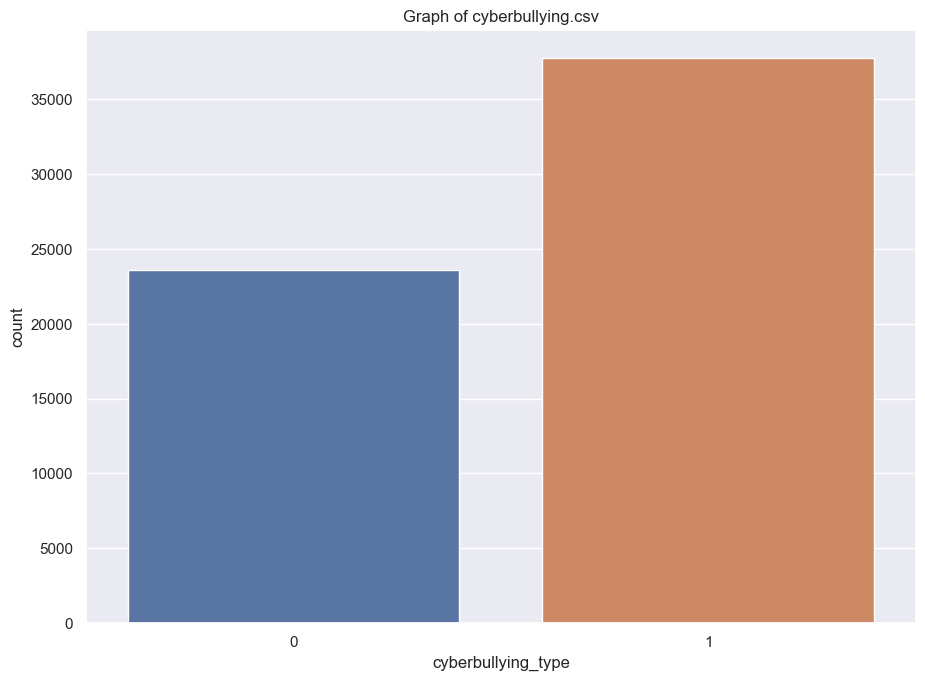

In [73]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type', data=df_cyber).set(title="Graph of cyberbullying.csv")

In [74]:
df_cyber["cyberbullying_type"].value_counts()

1    37751
0    23572
Name: cyberbullying_type, dtype: int64

In [75]:
text = ''.join(df_cyber["tweet_text"].tolist())

In [76]:
''.join(df_cyber["tweet_text"].tolist())

'classy whore red velvet cupcakesmeh p thanks heads concerned another angry dude twitteryes test god good bad indifferent weird whatever proves gods existencekarma hope bites kat butt nastyrebecca black drops school due bullyingbully flushes kdturkish state killed children last yearslove best response hotcakes managed film noncommittal meh adolescenttwitter basically angry letters generationbest pick line hi youre cute love people call james potter bully mypatronusisyougotta walk classss officially hate stupid bus systemknow saudis chased girls burning buildingstill jack amsterdam ciroc crown bud light limearita cru love handles feel jiggle walkeducation nation bullying turnisso bullyingknow people like dont listen old schoolfirst time happened probably worst thoughthing uber even wasnt horrible sexist shitty company would stillthink third period teacher doesnt like always tells go class walk u classhope round humbled girls cant cooklook dc public schools bullying lgbt students gonerea

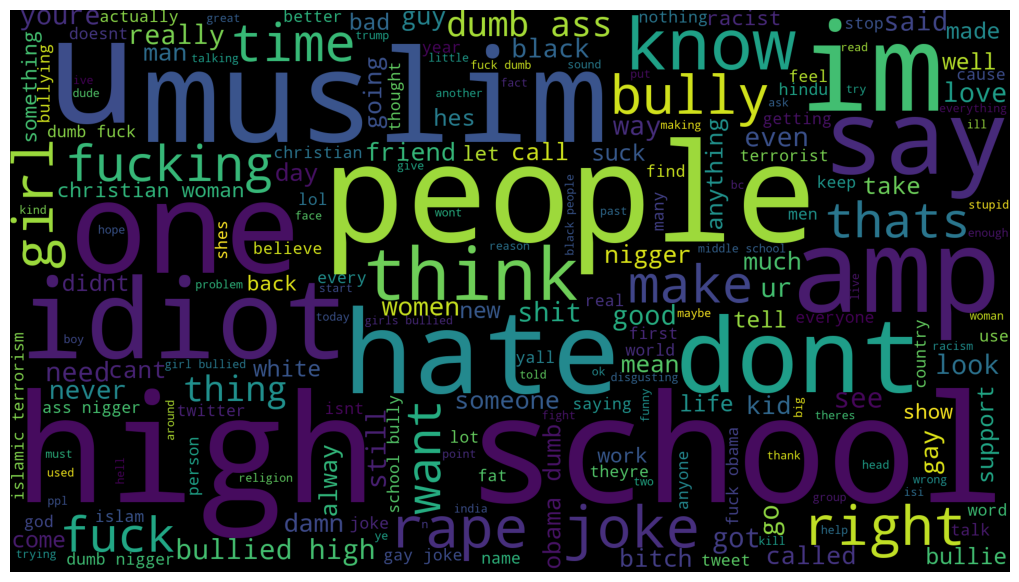

In [77]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()